# Project 2: Ames Housing Project

## Import libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

pd.set_option('max_columns', 99)

## Read in data

In [103]:
train = pd.read_csv('./datasets/train.csv')

In [104]:
test = pd.read_csv('./datasets/test.csv')

In [105]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [106]:
train.shape

(2051, 81)

## Data Cleaning

In [107]:
train.isnull().sum().to_frame().T

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,0,0,0,330,0,0,1911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,55,55,58,55,1,56,1,1,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1000,113,114,114,1,1,114,114,0,0,0,0,0,0,0,2042,1651,1986,0,0,0,0,0


>Pool QC, Fence, Misc Feature, Alley features have more than 80% of data missing, so going to drop

In [108]:
train.drop(columns=['Pool QC', 'Fence', 'Misc Feature', 'Alley'], inplace=True)

In [109]:
# see if there are any corrupt columns
train.select_dtypes('O').head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD


In [110]:
# drop row with Sale Type = Other, to account for foreclosures
train = train.drop(train.loc[train['Sale Type']=='Oth',:].index)

In [111]:
train.shape

(2047, 77)

## EDA

### Feature Engineering

**Total Baths**

In [112]:
# create feature of total bathrooms
train['total_bath'] = train['Full Bath'] + train['Half Bath']
test['total_bath'] = test['Full Bath'] + test['Half Bath']

# investigate mean sale price based off total baths
train.groupby('total_bath')['SalePrice'].mean()

total_bath
0     90155.500000
1    126457.150915
2    189119.122847
3    234220.536082
4    315119.100000
5    235876.000000
6    269500.000000
Name: SalePrice, dtype: float64

In [113]:
train['total_bath'].value_counts()

2    871
1    656
3    485
4     30
6      2
0      2
5      1
Name: total_bath, dtype: int64

In [114]:
# 3 houses with more than 4 baths and 2 houses with 0 baths
# drop columns since doesn't fit with trend of more baths = higher price
train.drop(index=train.loc[(train['total_bath'] > 4) | (train['total_bath'] == 0), :].index, inplace=True)

In [115]:
train.groupby('total_bath')['SalePrice'].mean()

total_bath
1    126457.150915
2    189119.122847
3    234220.536082
4    315119.100000
Name: SalePrice, dtype: float64

In [116]:
train.corrwith(train['total_bath'])['SalePrice']

0.5494765863201992

>Price increases as total bath increases with over 50% correlation. **Include feature**

**Street Type**

In [117]:
# dummy Street variable
train = pd.get_dummies(train, columns=['Street'])
test = pd.get_dummies(test, columns=['Street'])

train.groupby('Street_Pave')['SalePrice'].mean()

Street_Pave
0     86901.428571
1    181877.577396
Name: SalePrice, dtype: float64

In [118]:
train.corrwith(train['Street_Pave'])['SalePrice']

0.07005631829489577

In [119]:
train['Street_Pave'].value_counts()

1    2035
0       7
Name: Street_Pave, dtype: int64

>Higher average price for homes with paved streets (~100,000 dollar increase).

>However, correlation is really low and only 7 entries without paved streets, so not a significant feature to include.

**Lot Area**

In [120]:
train['Lot Area'].median()

9442.0

In [121]:
# compare mean sale price of houses more than median
# to see if there is a jump in mean housing price after a certain point
train.groupby(train['Lot Area'] > 9000)['SalePrice'].mean()

Lot Area
False    150047.363934
True     207130.294587
Name: SalePrice, dtype: float64

In [122]:
def convert_lot_area(price):
    if price > 21_780:
        return 1
    else:
        return 0

In [123]:
# create binary feature for lot size > half acre
train['big_house'] = train['Lot Area'].apply(convert_lot_area)

train.corrwith(train['big_house'])['SalePrice']

0.09699453848207966

In [124]:
train['big_house'].value_counts()

0    2001
1      41
Name: big_house, dtype: int64

In [125]:
train.corrwith(train['Lot Area'])['SalePrice']

0.29676727115783585

>Mean house price has a big difference for lot sizes greater than 9000. However, correlation is really low and sample size is really low, so not a significant feature

>However, correlation with general Lot Size did have a noteworthy correlation at 30%. **Include as feature**

**Categorical features investigated further:**

 Exter Qual,
 House Style, 
 Central Air, 
 KitchenQual

In [126]:
# turn ordinal data to numeric data
def ordinal_rank(item):
    if item == 'Ex':
        return 5
    elif item == 'Gd':
        return 4
    elif item == 'TA':
        return 3
    elif item == 'Fair':
        return 2
    else:
        return 1

**Exterior Quality & Kitchen Quality**

In [127]:
# apply conversion
train['Exter Qual'] = train['Exter Qual'].apply(ordinal_rank)
train['Kitchen Qual'] = train['Kitchen Qual'].apply(ordinal_rank)

test['Exter Qual'] = test['Exter Qual'].apply(ordinal_rank)
test['Kitchen Qual'] = test['Kitchen Qual'].apply(ordinal_rank)

In [128]:
train.corrwith(train['Exter Qual'])['SalePrice']

0.6915539374954227

In [129]:
train.corrwith(train['Kitchen Qual'])['SalePrice']

0.6626700354744548

>Correlation between Sale Price and Exterior Quality is very high. **Include feature**

>Correlation between Sale Price and Kitchen Quality is very high. **Include feature**

**House Stories**

In [130]:
# check if a house is 1 story or 2 stories
def floor_conversion(floor):
    if '1' in floor or floor == 'SFoyer' or floor == 'SLvl':
        return 0
    else:
        return 1

# add feature
train['floors'] = train['House Style'].apply(floor_conversion)
train.drop(columns=['House Style'], inplace=True)

test['floors'] = test['House Style'].apply(floor_conversion)

In [131]:
train.groupby('floors')['SalePrice'].mean()

floors
0    170889.635344
1    206234.675325
Name: SalePrice, dtype: float64

In [132]:
train.corrwith(train['floors'])['SalePrice']

0.20472935761698902

>Significant price difference between 1 and 2 story homes. Correlation is significant enough to include. **Include Feature**

In [133]:
train.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,total_bath,Street_Grvl,Street_Pave,big_house,floors
0,109,533352170,60,RL,NaN,13517,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500,3,0,1,0,1


In [190]:
train.groupby('floors')['Lot Area',
                        'SalePrice',
                        'Overall Qual',
                        'Year Built',
                        'Year Remod/Add',
                        'Exter Qual',
                        'Exter Cond',
                        'Total Bsmt SF',
                        '1st Flr SF',
                        '2nd Flr SF',
                        'total_bath',
                        'Garage Cars',
                        'Garage Area',
                        'Kitchen Qual',
                        'Fireplaces',
                        ''
                       ].mean()

,Lot Area,SalePrice,Overall Qual,Year Built,Year Remod/Add,Exter Qual,Total Bsmt SF,1st Flr SF,2nd Flr SF,total_bath,Garage Cars,Garage Area,Kitchen Qual,Fireplaces
floors,,,,,,,,,,,,,,
0,10222.896914,170889.635344,5.887798,1968.971950,1980.934081,3.323983,1120.583860,1240.723001,96.269986,1.626227,1.691445,459.256662,3.420757,0.545582
1,9713.657468,206234.675325,6.647727,1978.058442,1991.814935,3.558442,914.521104,989.410714,868.400974,2.685065,1.973984,508.032520,3.670455,0.696429


In [136]:
# get dummies for other important features
train = pd.get_dummies(train, columns=['Central Air'], drop_first=True)
test = pd.get_dummies(test, columns=['Central Air'], drop_first=True)

In [137]:
# Check price mean for AC
train.groupby('Central Air_Y')['SalePrice'].mean()

Central Air_Y
0    101041.250000
1    187478.130915
Name: SalePrice, dtype: float64

In [138]:
train.corrwith(train['Central Air_Y'])['SalePrice']

0.27565754797953823

>Relatively significant correlation and noticeable price difference for homes with AC. **Include Feature**

In [139]:
train.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bldg Type',
       'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air_Y', 'Condition 1',
       'Condition 2', 'Electrical', 'Enclosed Porch', 'Exter Cond',
       'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fireplace Qu',
       'Fireplaces', 'Foundation', 'Full Bath', 'Functional', 'Garage Area',
       'Garage Cars', 'Garage Cond', 'Garage Finish', 'Garage Qual',
       'Garage Type', 'Garage Yr Blt', 'Gr Liv Area', 'Half Bath', 'Heating',
       'Heating QC', 'Id', 'Kitchen AbvGr', 'Kitchen Qual', 'Land Contour',
       'Land Slope', 'Lot Area', 'Lot Config', 'Lot Frontage', 'Lot Shape',
       'Low Qual Fin SF', 'MS SubClass', 'MS Zoning', 'Mas Vnr Area',
       'Mas Vnr Type', 'Misc Val', 'Mo Sold', 'Neighborhood', 'Open Porch SF',
       'Overall Cond', 'Overall Qual', 'PID'

In [140]:
train['Bedroom AbvGr'].value_counts()

3    1105
2     543
4     264
1      74
5      41
6      10
0       4
8       1
Name: Bedroom AbvGr, dtype: int64

In [141]:
# dorp rows with 0 or >= 6 bedrooms because not large enough sample to be significant
train.drop(index=train.loc[(train['Bedroom AbvGr'] == 0) | (train['Bedroom AbvGr'] >=6), :].index);

In [142]:
train.corr()['SalePrice'].sort_values().to_frame().T

,PID,Enclosed Porch,Kitchen AbvGr,Overall Cond,MS SubClass,Street_Grvl,Id,Bsmt Half Bath,Low Qual Fin SF,Yr Sold,Misc Val,BsmtFin SF 2,Pool Area,Mo Sold,3Ssn Porch,Street_Pave,big_house,Bedroom AbvGr,Screen Porch,Bsmt Unf SF,floors,2nd Flr SF,Central Air_Y,Half Bath,Bsmt Full Bath,Lot Area,Wood Deck SF,Open Porch SF,Lot Frontage,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Garage Yr Blt,Full Bath,Year Remod/Add,total_bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Cars,Garage Area,Kitchen Qual,Exter Qual,Gr Liv Area,Overall Qual,SalePrice
SalePrice,-0.255144,-0.135005,-0.132216,-0.098747,-0.089539,-0.070056,-0.050121,-0.044951,-0.041799,-0.016552,-0.007485,0.01599,0.023091,0.032989,0.048733,0.070056,0.096995,0.131691,0.134602,0.190326,0.204729,0.245419,0.275658,0.279581,0.284431,0.296767,0.325868,0.333248,0.341042,0.423972,0.468993,0.502965,0.512679,0.532336,0.538533,0.548986,0.549477,0.570746,0.618139,0.629008,0.648681,0.64979,0.66267,0.691554,0.696126,0.799912,1.0


>High positive corr: Overall Qual, Gr Liv Area, Garage Area, Garage Cars, Total Bsmt SF, 1st Flr SF, Year Built

>High negative corr: Enclosed Porch, Kitchen AbvGr

In [143]:
df = train.loc[:, ['Overall Qual',
                  'Gr Liv Area',
                  'Exter Qual',
                  'Kitchen Qual',
                  'Garage Area',
                  'Garage Cars',
                  'Total Bsmt SF',
                  '1st Flr SF',
                  'Year Built',
                  'total_bath',
                  'Bedroom AbvGr',
                  'floors',
                  'Lot Area',
                  'Central Air_Y',
                  'SalePrice']]


#'Enclosed Porch',
#'Kitchen AbvGr',

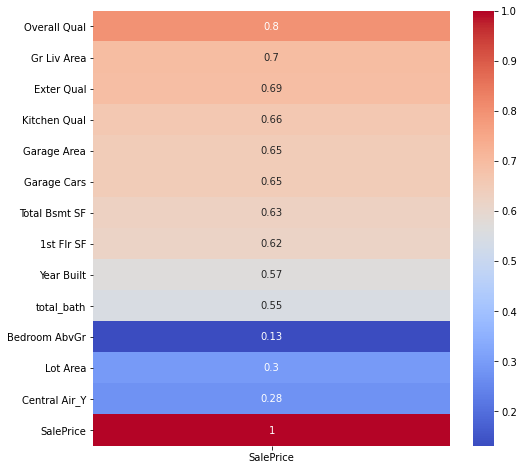

In [185]:
plt.figure(figsize=(8,8))
sns.heatmap(df.drop(columns='floors').corr()[['SalePrice']], annot=True, cmap='coolwarm');

In [145]:
df.isnull().sum()

Overall Qual     0
Gr Liv Area      0
Exter Qual       0
Kitchen Qual     0
Garage Area      1
Garage Cars      1
Total Bsmt SF    1
1st Flr SF       0
Year Built       0
total_bath       0
Bedroom AbvGr    0
floors           0
Lot Area         0
Central Air_Y    0
SalePrice        0
dtype: int64

In [146]:
# only 2 rows with missing values -- drop
df = df.dropna()

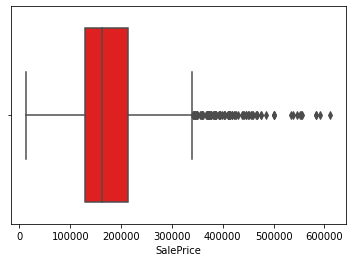

In [147]:
# Look at SalePrice distribution
sns.boxplot(df.SalePrice, color='red');

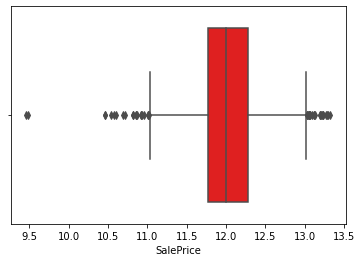

In [148]:
# transformed distribution
sns.boxplot(df['SalePrice'].map(np.log), color='red');

> Use **log transformation** to normalize SalePrice distribution

## Modeling

In [149]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# log transform target
log_y = y.map(np.log)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, log_y, random_state=42)

In [151]:
lr = LinearRegression()

In [152]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
# r2 scores for model
print('Training score:', lr.score(X_train, y_train))
print('Test score:', lr.score(X_test, y_test))

Training score: 0.8295363613456457
Test score: 0.8539417112966146


In [154]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8026839718008734

In [155]:
lr.coef_

array([ 9.68129091e-02,  2.11972601e-04,  3.69038011e-02,  6.13134955e-02,
       -2.00412644e-05,  7.26660819e-02,  7.90999675e-05, -5.26240126e-06,
        1.55838949e-03,  1.00741075e-02,  8.86493199e-03, -5.08708065e-02,
        4.01934914e-06,  1.62159850e-01])

In [156]:
df.columns

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual',
       'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'total_bath', 'Bedroom AbvGr', 'floors', 'Lot Area',
       'Central Air_Y', 'SalePrice'],
      dtype='object')

In [157]:
lr.intercept_

7.284641601372668

>So far model has a pretty balanced bias and variance.

In [158]:
pred = np.exp(lr.predict(X_test))

Text(0, 0.5, 'Actual Price')

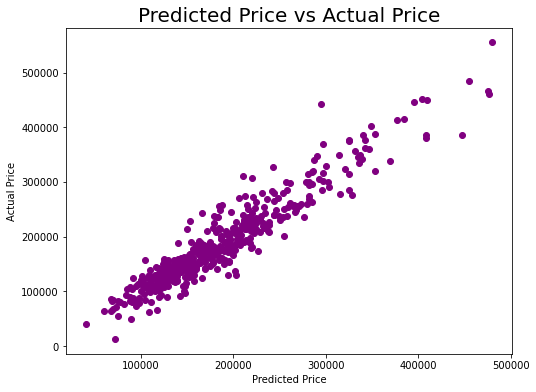

In [159]:
plt.figure(figsize=(8,6))

plt.scatter(pred, np.exp(y_test), c='purple')

plt.title('Predicted Price vs Actual Price', fontsize=20)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

### Regularization

In [160]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [161]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

alpha = np.logspace(-2, 1, 100)

# LASSO
lasso_cv = LassoCV(alphas=alpha, cv=5)
lasso_cv.fit(Z_train, y_train);

# Ridge
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(Z_train, y_train)

# Elastic Net
elastic_net_cv = ElasticNetCV(alphas=alpha, cv=5)
elastic_net_cv.fit(Z_train, y_train);

In [162]:
lasso_cv.alpha_

0.010722672220103232

In [163]:
print('OLS')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test), '\n')

print('LASSO')
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test), '\n')

print('Ridge')
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test), '\n')

print('Elastic Net')
print(elastic_net_cv.score(Z_train, y_train))
print(elastic_net_cv.score(Z_test, y_test))

OLS
0.8295363613456457
0.8539417112966146 

LASSO
0.8264259338112179
0.8503166276088129 

Ridge
0.8295017808613641
0.8536360906878006 

Elastic Net
0.8262876394642469
0.8497721222622421


>Lasso and Ridge are comparable, but I chose Lasso to help with feature selection and simplify the model

In [164]:
pd.DataFrame(lasso_cv.coef_, index=X.columns).T

,Overall Qual,Gr Liv Area,Exter Qual,Kitchen Qual,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,total_bath,Bedroom AbvGr,floors,Lot Area,Central Air_Y
0,0.136302,0.093502,0.018176,0.041741,0.0,0.050896,0.034757,0.012286,0.043666,0.0,0.0,-0.0,0.020924,0.03425


> Features not used: Garage Area, total_bath, Bedroom AbvGr, floors

**Exploring Interaction terms with PolynomialFeatures**

In [165]:
from sklearn.preprocessing import PolynomialFeatures

In [166]:
pf = PolynomialFeatures(include_bias=False)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

lr_pf = LinearRegression()
lr_pf.fit(X_train_pf, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
import warnings
warnings.filterwarnings('ignore')

ss = StandardScaler()
Z_train_pf = ss.fit_transform(X_train_pf)
Z_test_pf = ss.transform(X_test_pf)

alpha = np.logspace(-2, 1, 100)

# LASSO
lasso_cv_pf = LassoCV(alphas=alpha, cv=5)
lasso_cv_pf.fit(Z_train_pf, y_train);

# Ridge
ridge_cv_pf = RidgeCV(cv=5)
ridge_cv_pf.fit(Z_train_pf, y_train)

# Elastic Net
elastic_net_cv_pf = ElasticNetCV(alphas=alpha, cv=5)
elastic_net_cv_pf.fit(Z_train_pf, y_train);

In [168]:
print('OLS poly')
print(lr_pf.score(X_train_pf, y_train))
print(lr_pf.score(X_test_pf, y_test), '\n')

print('LASSO poly')
print(lasso_cv_pf.score(Z_train_pf, y_train))
print(lasso_cv_pf.score(Z_test_pf, y_test), '\n')

print('Ridge poly')
print(ridge_cv_pf.score(Z_train_pf, y_train))
print(ridge_cv_pf.score(Z_test_pf, y_test), '\n')

print('Elastic Net pol')
print(elastic_net_cv_pf.score(Z_train_pf, y_train))
print(elastic_net_cv_pf.score(Z_test_pf, y_test))

OLS poly
0.8948704583146431
0.8586749917372738 

LASSO poly
0.8545731309468559
0.8533253134215542 

Ridge poly
0.8884964323873058
0.859828457404806 

Elastic Net pol
0.8658277469809446
0.8566855990283774


##### **r2 scores are higher and more balanced after Regularization**

>Relatively high training r2 score after adding interaction terms, indicating a low bias. About 85% of variance explained by LASSO and about 89% explained by Ridge.

>Relatively high test r2 score after adding interaction terms. However, LASSO has the both training and test r2 scores at about 85%, making it the ideal model out of the four.

**Ideal model:** lasso_cv_pf

In [169]:
lasso_cv_betas = pd.Series(index = pf.get_feature_names(X.columns), data = lasso_cv_pf.coef_)
lasso_cv_betas[lasso_cv_betas != 0]

Overall Qual                  0.010275
Gr Liv Area                   0.016802
Total Bsmt SF                 0.096511
1st Flr SF                    0.011149
Year Built                    0.030425
Overall Qual Year Built       0.119954
Gr Liv Area Year Built        0.086359
Exter Qual Year Built         0.009713
Exter Qual Central Air_Y      0.015371
Kitchen Qual Garage Cars      0.057235
Kitchen Qual Year Built       0.018531
Kitchen Qual Central Air_Y    0.007662
Garage Area Central Air_Y     0.008042
Garage Cars Central Air_Y     0.000446
Total Bsmt SF^2              -0.085416
1st Flr SF Central Air_Y      0.016080
Lot Area Central Air_Y        0.028148
dtype: float64

> All relevant features and interaction terms from model

In [171]:
final_model = lasso_cv_pf
pred = np.exp(final_model.predict(Z_test_pf))

Text(0, 0.5, 'Actual Price')

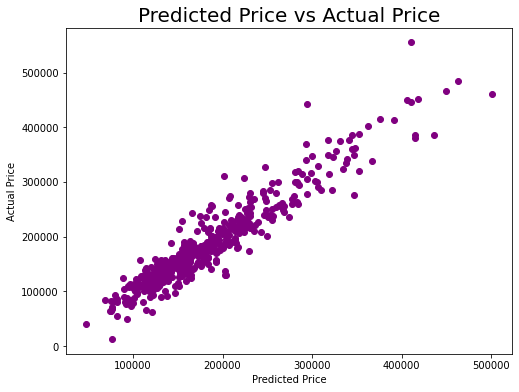

In [172]:
plt.figure(figsize=(8,6))

plt.scatter(pred, np.exp(y_test), c='purple')

plt.title('Predicted Price vs Actual Price', fontsize=20)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

## Kaggle Submission

In [ ]:
test_features = test[['Overall Qual',
                  'Gr Liv Area',
                  'Exter Qual',
                  'Kitchen Qual',
                  'Garage Area',
                  'Garage Cars',
                  'Total Bsmt SF',
                  '1st Flr SF',
                  'Year Built',
                  'total_bath',
                  'Bedroom AbvGr',
                  'floors',
                  'Lot Area',
                  'Central Air_Y']]

In [ ]:
test_features_pf = pf.transform(test_features)

test_features_pf_ss = ss.transform(test_features_pf)

In [ ]:
predictions = np.exp(final_model.predict(test_features_pf_ss))

In [ ]:
predictions = pd.Series(predictions, name='SalePrice')
ids = test['Id'].rename('Id')
pred_frame = pd.concat([ids, predictions], axis=1)
pred_frame.head()

In [ ]:
pred_frame.to_csv('./datasets/submission_lasso.csv', index=False)

In [ ]:
pred_frame.head()

In [ ]:
test.Id